# 확률론적 선형 회귀모형
- 최소자승법 OLS ordinary least square 을 사용하면 데이터에 대한 확률론적인 가정이 없어도 최적의 가중치를 계산할 수 있다. 
- 그러나 문제는 최적의 가중치가 어느 정도 신뢰도를 가지는지 알아야 한다.
    - 최적의 가중치가 양수, 음수, 0 이냐에 따라서 종속변수와의 상관관계가 달라지므로 예측한 가중치값을 어느정도 신뢰할 수 있는지 아는 것은 중요하다.
- **추정 오차의 크기에 따라서 최적의 가중치값이 0이나 음수가 될 수도 있고, 양수가 될 수도 있다.**
- 회귀 계수(상수항, 가중치항들)의 추정 오차를 구하기 위해서 부트스트래핑 방법을 사용하여 반복적인 재표본화 연산후 결과값의 분포 형태를 분석하여 알 수도 있다. 
- 또한 부트스트래핑 처럼 반복적인 연산없이 확률론적 선형 회귀모형을 사용하여 빠르게 추정 오차를 알 수 있다. 
    - 확률론적 선형 회귀모형의 분석을 통해서 **회귀계수의 표준오차 standard error of regression coefficient**를 계산할 수 있다.
- 이러한 원리를 사용하여 **단일계수 t 검정**을 통해 특정 가중치의 예측값에 대한 검정과 서로 다른 가중치가 얼마나 같은지(독립변수의 영향력)를 판단할 수 있다.
- 또한 **회귀분석 F검정**을 통해 전체 독립변수의 영향도를 검정함으로써 모델의 성능을 판단할 수 있다. 

## 1. 부트스트래핑
- ``부트스트래핑 bootstrapping`` : 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과는 어느 정도 영향을 받는지 알기 위한 방법이다.
    - 즉 OLS로 구한 가중치의 추정값이 표본 데이터에 따라 달라지므로, 데이터에 변화를 주어 가중치값이 어떻게 변화하는지 알기 위한 방법이다.
- ``재표본화 re-sampling`` : 기존의 N개의 데이터에서 N개의 데이터를 선택한다. 중복 선택도 가능하다.  
    - 재표본화 방법을 사용하여 기존의 데이터에서 무작위의 데이터를 반복 선택한다.
    - 선택 된 데이터에서 OLS 방법으로 가중치의 추정값을 구한다.
    - 여러번 반복하면 여러개의 가중치 추정값이 나오는데 이를 분포로 확인한다. 
- 선형 회귀 모형의 y절편인 상수값과 기울기인 가중치값을 반복하여 구한 후 분포를 확인한다.
- 재표본화 된 데이터에 따라서 값이 달라지며 어떤 분포를 형성한다. 이 분포의 평균, 분산, 표준편차 등을 확인하여 어느정도 신뢰할 수 있는지 알 수 있다. 

### 1-1. 선형 회귀 데이터 생성
- 선형 회귀 모형을 따르는 100개의 가상 데이터 생성
    - $y = w_0 + w_1x + \epsilon$

In [1]:
from sklearn.datasets import make_regression

In [2]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                             coef=True, random_state=0)

#### 독립변수 X0의 표본 데이터

In [3]:
X0

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575],
       [ 0.44386323],
       [-0.97727788],
       [ 0.42833187],
       [ 0.20827498],
       [-0.31155253],
       [-0.51080514],
       [ 0.12691209],
       [-1.53624369],
       [-0.40178094],
       [ 0.6536186 ],
       [ 1.17877957],
       [-0.17992484],
       [ 1.78587049],
       [ 1.45427351],
       [-0.68481009],
       [ 0.97873798],
       [ 1.89588918],
       [-0.4380743 ],
       [ 0.3130677 ],
       [ 0.76103773],
       [ 0.77749036],
       [ 1.9507754 ],
       [ 0.33367433],
       [-0.34791215],
       [ 1.53277921],
       [-0.89546656],
       [-0.57884966],
       [-1.04855297],
       [ 0.37816252],
       [ 0.01050002],
       [ 0.46278226],
       [ 0.14404357],
       [-0.40317695],
       [ 0.0519454 ],
       [-1.25279536],
       [ 1.05445173],
       [ 0.40015721],
       [-1.70627019],
       [ 2.2408932 ],
       [ 0.17742614],
       [-0

#### 종속변수
- 정답, 라벨

In [4]:
y

array([ -24.67192895,    1.2842068 ,    6.06033557,    1.78147734,
        -33.77202985,   37.17742373,  -71.22464457,   17.0657657 ,
         34.07428382,  -31.50041797,  -33.28419358,   13.22539423,
        -87.86604817,  -39.63961681,   33.67939492,   70.92281173,
         -2.62705419,   72.02496491,   98.91162315,  -18.60350664,
         62.10062253,   74.58575549,   19.09907672,   15.06414713,
         58.08452661,   78.64098834,   90.96259952,   10.96694539,
         20.05863712,   72.17616618,  -55.50206871,  -19.30146574,
        -57.66553143,   44.92532351,  -43.92216645,   41.93402862,
         36.58989574,   -9.02514481,  -33.1469412 ,  -38.81588741,
         24.04860806,   18.02776344,  -68.36827069,   69.44160984,
         20.54448353,  -48.51131299,   79.02558001,  -33.90420151,
         69.94877747,  -17.45773982,  -11.6672389 ,  -83.79199748,
        -18.27434762,    8.46390826,   40.61035963,   21.87121825,
        -16.02269223, -119.0521092 ,   70.44247566,   -2.18612

#### 가중치값
- 계수, 모수, 

In [5]:
coef

array(42.38550486)

### 1-2. OLS 분석으로 가중치값 추정
- make_regression으로 만든 데이터의 가중치값 coef와 OLS 분석으로 추정한 가중치값 X1을 비교해 본다.

#### 독립변수, 종속변수 데이터 프레임 생성
- 독립변수 데이터 프레임에는 상수항 결합을 해준다.

In [6]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

In [7]:
dfX.head()

,const,X1
0,1.0,-0.359553
1,1.0,0.976639
2,1.0,0.402342
3,1.0,-0.813146
4,1.0,-0.887786


In [8]:
dfy.head()

,y
0,-24.671929
1,1.284207
2,6.060336
3,1.781477
4,-33.772030


#### OLS 분석 모델 생성, 회귀분석
- const : 상수항 : y절편
- X1 : 기울기 : 가중치값 : 모수, 계수
- **가중치 추정값이 표본 데이터의 가중치(실제값)와 다르다.**

In [9]:
model = sm.OLS(dfy, dfX)
result = model.fit()
result.params

const    -1.628364
X1       42.853356
dtype: float64

### 1-3. 부트스트래핑
- make_regression으로 만든 표본 데이터에서 무작위로 100개씩 선택하여 재표본화한다.
- 이 재표본화 한 데이터를 OLS 분석을 통해 상수항과 가중치값을 추정한다.
- 이 과정을 1000번 반복한다.
    - 결과적으로 상수항 추정치 1000개, 가중치 추정치 1000개를 얻을 수 있다.    

In [10]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)

for i in range(N) : 
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 781 ms


In [11]:
params_w0

array([-2.46527666e+00,  6.44516081e-01, -3.12355155e-01, -1.72225580e+00,
       -5.12928028e+00,  1.83259441e-01, -3.17364663e+00, -2.00530768e+00,
        2.11460064e+00,  1.96017138e+00, -2.62148568e+00, -3.13661974e+00,
        7.57616176e-01, -2.02850359e+00, -1.60727185e-01,  2.17378168e-02,
       -6.74994311e-01,  1.93069906e-01,  6.82417023e-01, -4.55935159e-01,
       -4.49671435e+00, -2.86625941e+00,  2.94572325e-01, -4.42115495e+00,
       -1.02780069e-01, -4.28357692e+00, -3.70459170e-01, -1.40935588e+00,
       -4.79770124e+00,  9.58348560e-01,  7.09303509e-01, -1.68154534e+00,
       -1.47080956e-01, -4.24120147e-01, -2.34422859e+00,  5.42643775e-01,
       -1.16045240e+00, -6.68501552e-01, -5.14274288e+00, -3.40927566e+00,
       -2.13411773e+00, -3.14791099e+00, -4.85644252e+00, -2.04639147e+00,
       -1.15063314e+00,  6.03822121e-01, -2.64041381e+00, -3.44389441e+00,
       -1.91364593e+00, -4.00555978e+00, -2.65911718e+00, -3.89569652e+00,
       -2.63910438e+00, -

In [12]:
params_w1

array([44.42923438, 44.08800183, 41.84399297, 42.71164833, 43.89322749,
       43.48375223, 45.41096713, 38.21711071, 42.2984557 , 43.58188833,
       40.47571463, 42.65538958, 42.75046882, 47.09125188, 40.11213389,
       41.17569535, 42.48370871, 43.2907589 , 41.02330854, 42.18211907,
       42.39145507, 39.13023101, 44.08372921, 43.23116526, 44.53090227,
       41.60072429, 40.38474576, 40.43639873, 41.27848362, 40.59208901,
       45.46393048, 40.52951661, 43.87604468, 43.48252354, 40.38456591,
       42.72643442, 43.86746251, 39.51151448, 44.45155552, 45.39902924,
       39.66755431, 41.94254847, 45.09753999, 40.70572387, 43.81288092,
       45.04391601, 45.3286562 , 43.97394985, 42.58153783, 41.90432058,
       45.413168  , 42.87968882, 43.63247374, 43.56366147, 43.47414202,
       43.05619362, 45.0060529 , 43.07718443, 45.8603146 , 42.52386127,
       40.49637482, 43.42407736, 42.78737523, 40.96779335, 41.89546269,
       42.44945796, 40.55544263, 44.69567609, 37.58782465, 43.28

#### 코드 확인
- 100까지의 정수중에서 100개의 숫자를 무작위로 선택해 준다.

In [13]:
test_idx = np.random.choice(len(dfy), len(dfy), replace=True)
test_idx

array([48, 27, 37, 51, 54, 37,  7, 61, 26, 51, 97, 92, 42, 25, 55, 67, 32,
       34, 97, 40, 45,  5,  9, 26,  5, 25, 27, 63, 46, 19, 24, 29, 62, 24,
       47, 99, 73, 69, 59, 81, 30,  7, 77, 15, 49, 68, 61, 78, 84, 53, 34,
       35, 55, 63, 75, 27, 63, 36, 25, 45, 75, 89, 84, 54, 10, 25, 81, 26,
       51, 57, 19, 36, 33, 39, 98, 99, 40,  2, 22, 87, 48, 12, 38, 75, 98,
       69, 43, 18, 80, 96, 17, 48, 75,  5, 46, 49, 77, 68, 60, 32])

#### 선택한 숫자를 데이터 프레임의 조건으로 사용하면 재표본화

In [14]:
dfX.iloc[test_idx, :]

,const,X1
48,1.0,1.764052
27,1.0,0.333674
37,1.0,-0.403177
51,1.0,-1.420018
54,1.0,1.139401
...,...,...
49,1.0,0.410599
77,1.0,0.950088
68,1.0,1.222445
60,1.0,-0.870797


In [15]:
dfy.iloc[test_idx, :]

,y
48,69.948777
27,10.966945
37,-9.025145
51,-83.791997
54,40.610360
...,...
49,-17.457740
77,18.865677
68,38.132766
60,-34.742186


### 1-4. 상수항과 가중치의 추정치의 분포
- 1000번 재표본화한 데이터의 상수항과 가중치의 추정치의 분포를 히스토그램으로 확인한다.
    - w1 : 가중치의 분포
    - w0 : 상수항의 분포
- 기술 통계값을 구하여 분포의 모양을 확인 할 수 있다.
- **분포 : 카테고리값 -> 카운터플롯, 실수값 -> 히스토그램(distplot)**

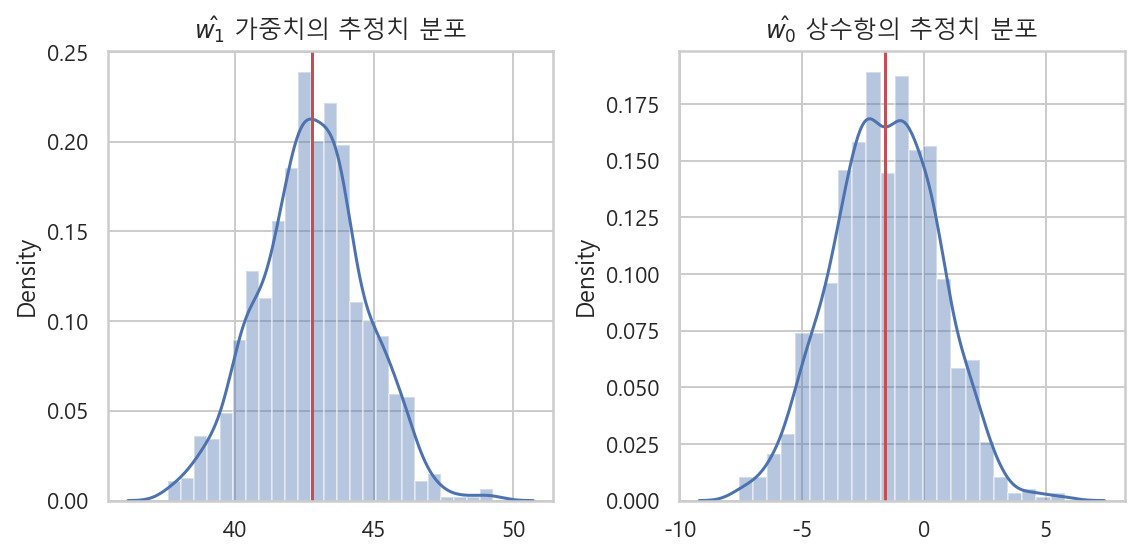

In [16]:
%matplotlib inline

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c="r")
plt.title("$\hat{w_1}$ 가중치의 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c="r")
plt.title("$\hat{w_0}$ 상수항의 추정치 분포")

plt.tight_layout()
plt.show() ; 

### 1-5. 가중치 추정값의 평균과 표준편차
- 가중치의 평균 : 42.83
- 가중치의 표준편차 : 1.923
- 추정오차 : 42.83 +- 3.846
- **오차가 커도 0이나 음수가 될 가능성은 적다**

In [17]:
params_w1.mean(), params_w1.std()

(42.750296522132004, 1.9007254306863821)

### 1-6. 상수항 추정값의 평균과 표준편차
- 상수항의 평균 : -1.56
- 상수항의 표준편차 : 2.09
- 추정오차 : -1.56 +- 4.18
- **오차에 따라서 0이 될 수도 음수가 될 수도 있다**

In [18]:
params_w0.mean(), params_w0.std()

(-1.579836825943344, 2.1565947460920163)

### 1-7. OLS Summary로 확인
- ``회귀 계수의 표준 오차 std err`` : 표준편차와 비슷한 값
    - standard erorr of regression coefficient
- ``[0.025   0.975]`` : 추정오차 구간과 비슷한 값
- **OLS summary의 값은 부트스트래핑이 아닌 확률론적 선형 회귀모형을 사용한 것이다.**
    - 확률론적 선형 회귀 모형을 사용하면 부트스트래핑 처럼 많은 계산을 하지 않아도 빠르고 안정적으로 가중치의 추정값의 오차를 구할 수 있다. 

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           2.21e-36
Time:                        14:25:44   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 2. 확률론적 선형 회귀모형
- 확률론적 선형 회귀모형은 상수항, 가중치 추정값의 오차를 빠르고 안정적으로 구할 수 있다. 
- 확률론적 선형 회귀모형은 데이터가 확률변수 X로부터 생성 된 표본이라고 가정한다.
- 구체적인 가정들

### 2-1. 선형 정규 분포 가정
- 선형 회귀 분석의 기본 가정
- 1) 종속변수 y는 독립변수 x의 선형 조합으로 결정되는 기댓값과 고정된 분산을 갖는 **가우시안 정규 분포이다.**
    - $y \sim \mathcal{N}(w^Tx, \sigma^2) $
- 2) 종속변수 y의 확률밀도 함수
    - $p(y|x, \theta) = \mathcal{N} (y|w^Tx, \sigma^2)$
- 3) 잡음으로 식을 나타낼 수 있다.
    - $\epsilon = y - w^Tx$
- **x,y 중 어느 것도 그 자체로 정규 분포일 필요는 없다** 
    - y도 x에 대해 조건부로 정규분포를 이룬다는 것이지, 무조건 y가 정규분포라는 것은 아니다. 
    - x,y가 정규분포가 아니어도 선형정규분포 가정이 성립한다는 것

### 2-2. 외생성 가정
- **잡음의 기댓값은 x의 크기에 상관없이 항상 0이라고 가정한다.**
    - 외생성 exogeneity 가정
- 1) 조건부 기댓값은 0이다.
    - $\text{E} [\epsilon | x] = 0$ : 조건부 기댓값
- 2) 무조건부 기댓값은 0이다.
    - $\text{E} [\epsilon] = \text{E} [\text{E} [\epsilon | x]] = 0$
- 3) 잡음과 독립변수 x의 상관관계는 없다.
    - $\text{E} [\epsilon x] = \text{E} [\text{E} [\epsilon x | x]] = \text{E} [x \text{E} [\epsilon | x]] = 0$

### 2-3. 조건부 독립 가정
- **i번째 잡음과 j번쨰 잡음의 공분산 값은 x와 상관없이 항상 0이라고 가정한다.**
- 1) 공분산
    - $\text{Cov} [\epsilon_i, \epsilon_j | x] = 0 \;\; (i, j = 1, 2, \cdots, N) $
- 2) i번째, j번째 잡음은 서로 독립이다.
    - $\text{E} [\epsilon_i \epsilon_j] =  0 \;\; (i,j = 1, 2, \cdots, N)$
- 3) 잡음 벡터의 공분산 행령은 대각행렬이다. (비대각성분은 모두 0이어야 한다.)
    - $\text{Cov} [\epsilon] = \text{E} [\epsilon\epsilon^T] = diagonal\;matrix$
    
### 2-4. 등분산성 가정
- **i번째 표본의 잡음, j번째 표본의 잡음의 분산 값이 표본과 상관없이 항상 같다고 가정한다.**
- 잡음 벡터의 공분산 행렬이 항등행렬이 되어야 한다.
- $\text{Cov} [\epsilon] = \text{E} [\epsilon\epsilon^T] = \sigma^2 I$

## 3. 최대가능도 방법을 사용한 선형회귀분석
- ``최대가능도 방법 maximum likelihood estimation``
- 1) 가능도 구하기 : 모수를 변수로, 변수 x를 상수항으로 입력받는 함수

$\begin{aligned} 
    p(y_{1:N} | x_{1:N}, \theta) 
    &= \prod_{i=1}^{N} \mathcal{N} (y_i | w^Tx_i, \sigma^2) \\
    &= \prod_{i=1}^{N} \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left\{ - \dfrac{(y_i - w^Tx_i)^2}{2\sigma^2} \right\}  \\
\end{aligned}$

- 2) 로그가능도로 변환 : 가능도에 로그를 적용하여 계산을 쉽게 한다. 곱을 더하기로.

$\begin{aligned}
    \text{LL} = \log p(y_{1:N} | x_{1:N}, \theta)
    &= -\dfrac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - w^Tx_i)^2 - \dfrac{N}{2} \log 2\pi \sigma^2
\end{aligned}$

- 3) 상수항을 C로 변환하고 행렬로 나타내기

$\text{LL} = - C_1(y-Xw)^T(y-Xw) - C_0 = -C_1(y^Ty - 2y^TXw + w^TX^TXw) - C_0$

- 4) MLE로 구한 식을 최적화 : 가중치항 w로 미분한 값이 0일때의 w 추정값
    - MLE의 최적화 결과는 OLS와 같은 결과이다.

$\dfrac{d LL}{dw} = - C_1 (2X^TX\hat{w} - 2X^TXy) = 0 \\$
$\hat{w} = (X^TX)^{-1}X^Ty$

## 4. 잔차의 분포
- **확률론적 선형 회귀모형에 따르면 회귀분석에서 생기는 잔차 e도 정규분포를 따른다.**
    - 잡음의 선형변환이기 때문에, 잡음이 정규분포 이듯 잔차도 정규분포를 따른다.
- 1) 잔차
    - $e = y - w^Tx$
- 2) hat 행렬, 투영행렬(projection), 영향도행렬(influence)    
    - $\hat{y} = X\hat{w} = X(X^TX)^{-1}X^Ty = Hy$
    - $H = X(X^TX)^{-1}X^T$
- 3) 잔차행렬(residual)
    - $e = y - \hat{y} = y - Hy = (I - H)y = My$
    - $M = I - H = I - X(X^TX)^{-1}X^T$
- 4) 확률적 선형회귀 모형의 가정을 적용하여 잔차를 다시 나타내면, 잡음의 선형변환이라는 것을 알 수 있다.
    - $e = My = M(Xw + \epsilon) = MXw + M\epsilon, \;\; MX=0$
    - $e = M\epsilon$
- 5) 잡음의 조건부 기댓값이 0이므로, 선형변환한 잔차의 조건부 기댓값도 0이다.
    - $\text{E} [e | x] = 0$

#### 잔차의 분포는 정규분포를 따른다.

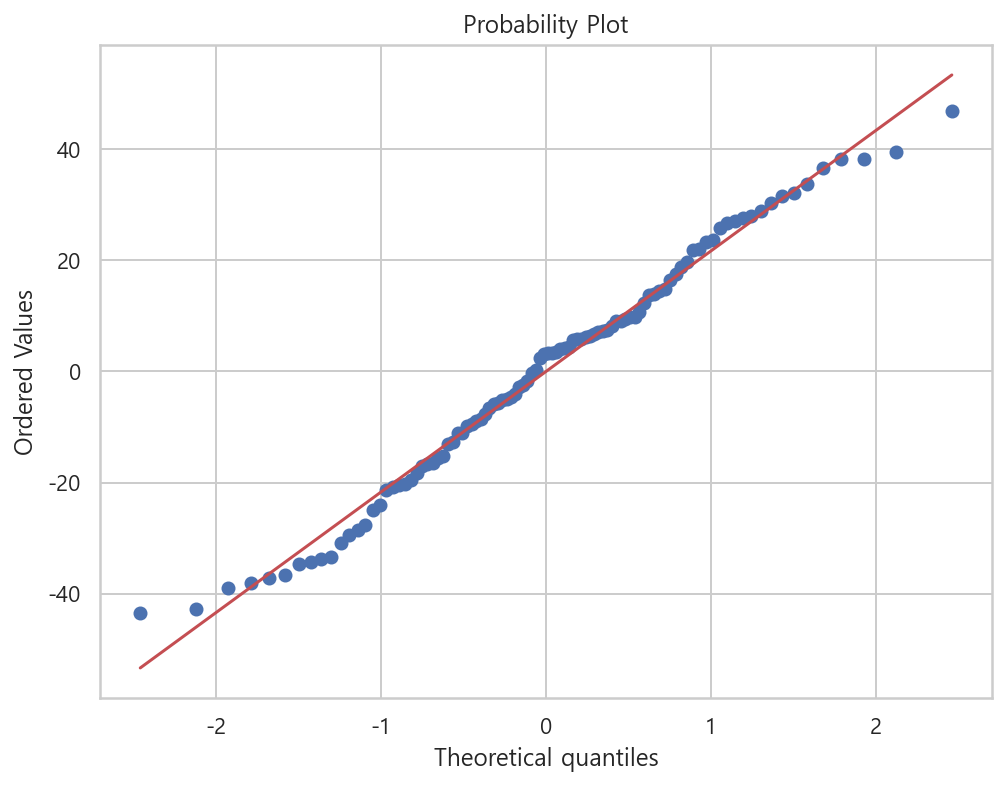

In [20]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sp.stats.probplot(result.resid, plot=plt)
plt.show() ;

In [21]:
result.resid

0     -7.635506
1    -38.939690
2     -9.552990
3     38.255888
4      5.900932
        ...    
95     4.060166
96    31.612511
97    -5.178971
98    33.665479
99    -8.575956
Length: 100, dtype: float64

### 4-1. 잔차의 정규성

In [22]:
test = sm.stats.omni_normtest(result.resid)
test

NormaltestResult(statistic=3.522505660167542, pvalue=0.17182945580489245)

In [23]:
for xi in zip(["chi^2", "p-value"], test) :
    print("%-10s : %6.3f" % xi)

chi^2      :  3.523
p-value    :  0.172


In [24]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(["Jarque_Bera", "P-value", "Skew", "Kurtosis"], test) : 
    print("%-12s : %6.3f" % xi)

Jarque_Bera  :  2.059
P-value      :  0.357
Skew         : -0.073
Kurtosis     :  2.312


### 4-2. 잔차의 기댓값
- 잔차의 기댓값은 x와 상관없이 0이어야한다.

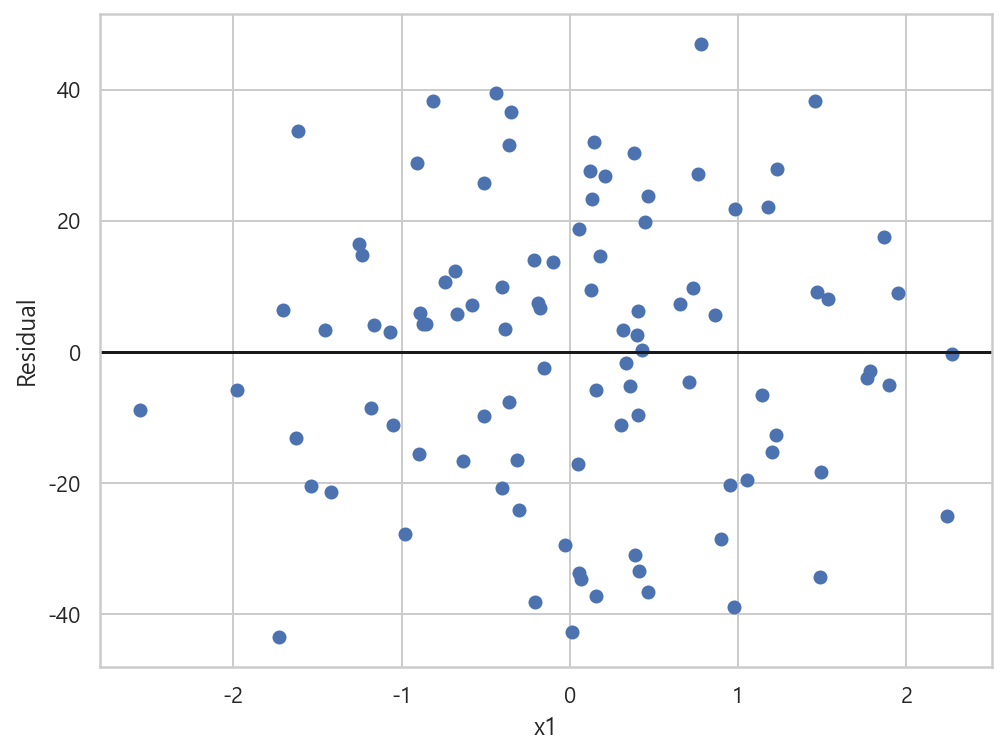

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(X0, result.resid, "o")
plt.axhline(y=0, c="k")
plt.xlabel("x1")
plt.ylabel("Residual")
plt.show() ; 

### 4-3. 독립변수 x가 e(잔차)에 미치는 영향
- x가 e에 미치는 영향 확인
- 구간별로 e의 분포 모양 확인 : x에 상관없이 두 분포의 기대값은 0에 가깝다.
    - 0 < x < 1
    - 1 < x < 2
- 독립변수 x에 상관없이 잔차의 기대값은 0에 가깝다.    

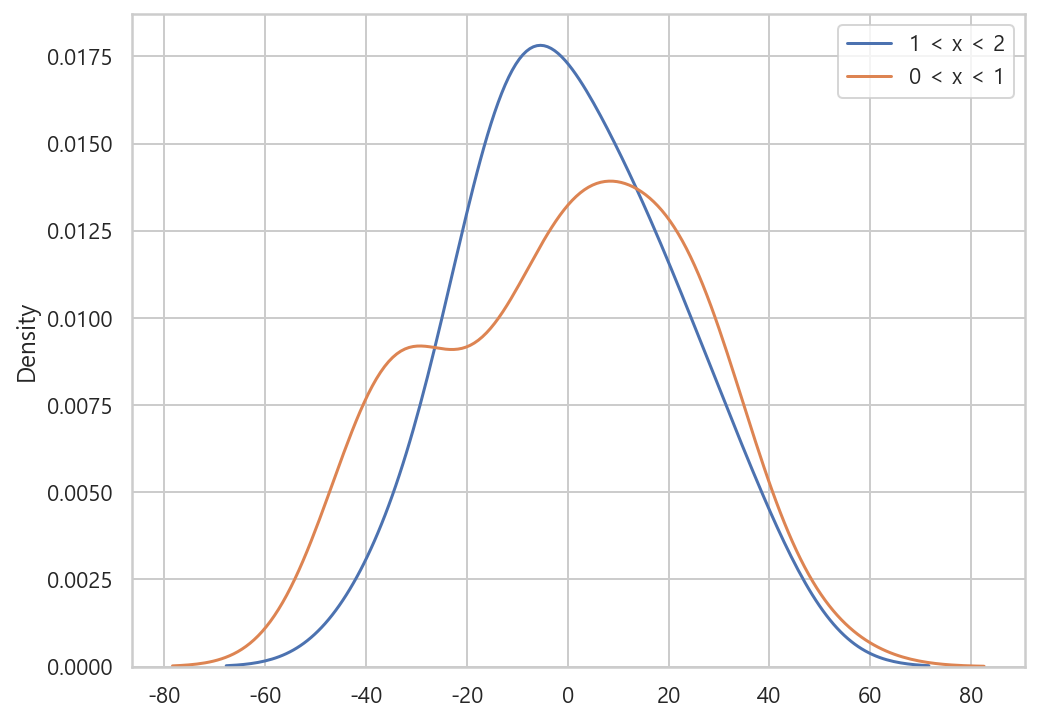

In [26]:
plt.figure(figsize=(8, 6))
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")

plt.legend()
plt.show() ; 

In [27]:
result.resid[((1 < X0) & (X0 < 2)).flatten()]

15    22.036515
17    -2.877215
18    38.219487
21    -5.031094
26     8.993691
29     8.119797
40   -19.509823
46    27.931859
48    -4.018422
54    -6.588420
58     9.103885
62   -15.298590
68   -12.624743
69    17.509020
73   -18.351910
78   -34.308694
dtype: float64

In [28]:
result.resid[( (1 < X0) & (X0 < 2) ).flatten()].mean()

0.8315840246840249

In [29]:
result.resid[( (0 < X0) & (X0 < 1) ).flatten()].mean()

-0.9383616315036423

## 5. 회귀계수의 표준 오차
- ``회귀계수의 표준오차 standard error of regression coefficient``
- 선형회귀 모형의 계수의 추정값에 대한 신뢰구간, 추정 오차를 구하기 위한 방법
    - 계수의 공분산 행렬의 대각성분이 계수의 분산이므로, 이 분산에 루트를 씌워 표준 편차를 얻는 방식
    - std err을 검정 통계량으로 사용하면 계수의 값에 대한 검정, 계수간 상관관계의 검정, 전체 계수의 의미에 대한 검정 등을 할 수 있다.
    - 즉 계수에 대한 신뢰구간을 구한 후 특정 계수의 값이 이 구간안에서 가능한지 가능하지 않은지를 검정할 수 있다.
- 1) **가중치의 예측치 w^도 잡음의 선형변환이므로 정규분포를 따른다. 잡음은 정규분포 확률변수이다.**
    - $\hat{w} = (X^TX)^{-1}X^Ty = w + (X^TX)^{-1}X^T \epsilon$
- 2) **가중치의 예측치의 기댓값은 w의 비편향 추정값이다.**
    - $\text{E}[\hat{w}] = \text{E} [w + (X^TX)^{-1}X^T\epsilon] = w$
- 3) **가중치의 예측치의 공분산** : 즉 가중치의 예측치가 어떤 분포, 범위안의 값인지를 계산하는 과정
    - $\text{Cov} [\hat{w}] = \text{E} [(\hat{w}-w)(\hat{w}-w)^T] = \sigma^2(X^TX)^{-1}$
- 4) **잡음의 분산 : 잔차의 분산으로 추정한다.** : 잡음의 분포와 가중치의 분포를 통해서 가중치가 어느정도 범위안에 있는지 추정하는 과정
    - $\text{E} [e^2] = \text{E} [(M\epsilon)^2] = \sigma^2(N-K)$
- 5) **잡음에 대한 비편향 표본분산** : 잡음의 분산에서 유도된 것으로 보임
    - $s^2 = \dfrac{e^Te}{N-k} = \dfrac{RSS}{N-k}$
- 6) **w^의 공분산의 추정값** : 가중치의 공분산에서 유도된 것으로 보임
    - $\text{Cov} [\hat{w}] \approx s^2(X^TX)^{-1}$
- 7) **이 공분산 행렬의 대각성분이 w_i의 분산이다.**
    - $\text{Var}[\hat{w}_i] = (\text{Cov}[\hat{w}])_{ii}$
- 8) **이 값에 루트를 씌워 표준편차를 구한 값이 회귀계수의 표준 오차이다. std err** 
    - $\sqrt{\text{Var}[\hat{w}_i]} \approx se_i = \sqrt{s^2\left((X^TX)^{-1}\right)_{ii}}$
- 9) **정규화 된 모수의 오차 = 자유도 N-K 인 스튜던트 t분포**
    - $\dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-k}$

## 단일 계수 t-검정
- 정규화 된 모수 오차를 검정 토계량으로 사용하면 w_i의 값에 대한 검정을 할 수 있다.
- single coefficient t-test
- p-value 값이 0.000에 가까울 수록 귀무가설이 기각되는 정도가 세다.
- p-value 값이 유의수준보다 크면 귀무가설이 채택된다.
- 계수의 추정값이 신뢰구간을 벗어날 수록 p-value 값이 0.000에 가까워진다.

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           2.21e-36
Time:                        14:26:39   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

#### 가중치의 추정값 42는 가능할까?
- p-value : 0.691 : 응 가능해

In [36]:
print(result.t_test("X1 = 42"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      0.398      0.691      38.603      47.104


#### 가중치의 추정값으로 40은 괜찮을까?
- p-value : 0.186 : 살짝 가능해.

In [37]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


#### 가중치의 추정값으로 38은 괜찮을까?
- p-value : 0.026 : 안돼

In [38]:
print(result.t_test("X1 = 38"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      2.266      0.026      38.603      47.104


In [39]:
print(result.t_test("X1 = 35"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      3.667      0.000      38.603      47.104


In [40]:
print(result.t_test("X1 = 46"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142     -1.469      0.145      38.603      47.104


In [41]:
print(result.t_test("X1 = 47"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142     -1.936      0.056      38.603      47.104


In [42]:
print(result.t_test("X1 = 50"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142     -3.337      0.001      38.603      47.104


## 두 독립변수의 계수값 비교
- t_test() 클래스 : 범주형 독립변수의 범주값이 가지는 유의성을 판단하는데 유용하다. 

In [43]:
import datetime
from calendar import isleap

In [44]:
df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem

,time,value
0,1920.000000,40.6
1,1920.083333,40.8
2,1920.166667,44.4
3,1920.250000,46.7
4,1920.333333,54.1
...,...,...
235,1939.583333,61.8
236,1939.666667,58.2
237,1939.750000,46.7
238,1939.833333,46.6


In [45]:
def convert_partial_year(number) : 
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [46]:
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round("60min") + \
datetime.timedelta(seconds=3600 * 24)

df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype("category")
del df_nottem["date0"], df_nottem["date"]

df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


In [47]:
model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          2.96e-125
Time:                        14:34:21   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

#### 1월과 2월의 가중치의 추정값은 같다고 볼 수 있을까?
- 응 거의 같다고 볼 수 있어.
- p-value 값이 큼 : 귀무가설이 채택된다.

In [46]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


#### 2월과 3월의 가중치의 추정값은 같다고 볼 수 있을까?
- 아니, 두 가중치의 추정값은 같지 않아.
- p-value 가 0 : 귀무가설 기각

In [48]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


In [49]:
print(result_nottem.t_test("C(month)[01] = C(month)[12]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1650      0.732      0.225      0.822      -1.277       1.607


#### 계수의 추정치값에서 std err의 2배를 뺴거나 더하면 신뢰구간이다.

In [50]:
0.1650 - (0.732 * 2)

-1.299

In [51]:
0.1650 + (0.732 * 2)

1.629